In [1]:
station_name = "Barbados"
iterations = 200000

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utils.utils import pretty_lat, pretty_lon, ProgressStatus, plot_n_steps_of_area_from_nc_file

In [3]:
from station.data_submission import DataSubmission


from train_station_twin.training_executer import TrainingExecuter
%matplotlib inline
from utils.utils import plot_measurements_df


In [4]:
station_submission = DataSubmission(name=station_name, mask_years=[2021])
station_submission.measurement_dir_path = f"./measurements/{station_name.capitalize()}"

station_submission.initialize_station()

Extracting Barbados...


100%|██████████| 1263/1263 [01:38<00:00, 12.88it/s]


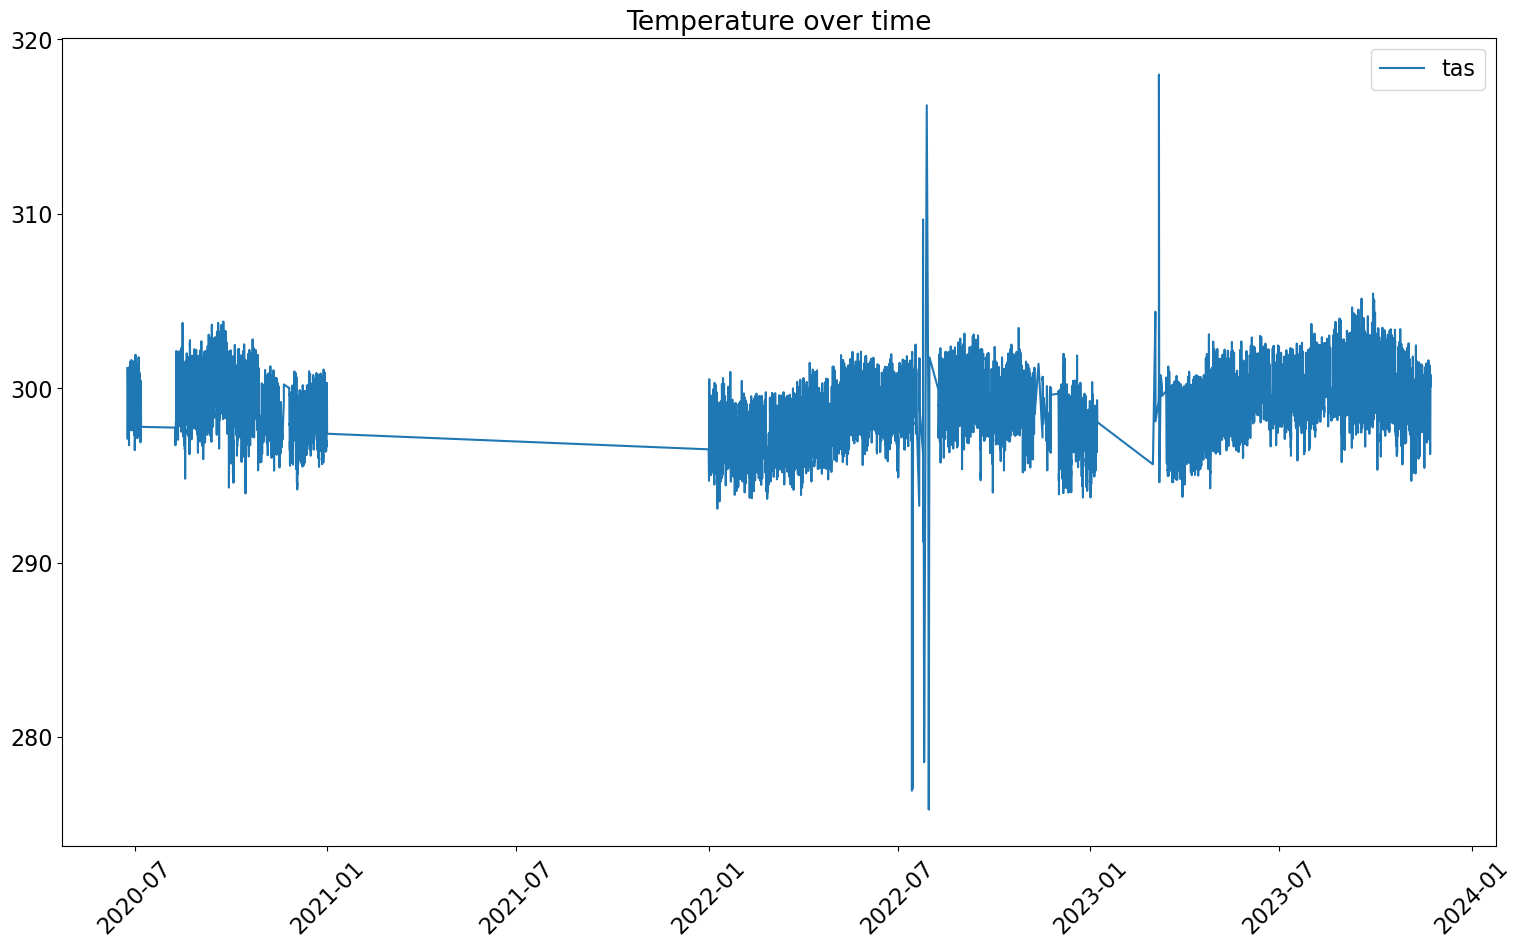

In [5]:
plot_measurements_df(station_submission.station.df)

In [6]:

training = TrainingExecuter(
    station = station_submission.station,
    progress = station_submission.progress,
    iterations = iterations,
    local = True,
)




(16441,)
Saving to /home/k/k203179/digital-twin-for-weather-station/tmphyhs030u/train/barbados.nc


In [7]:
job_id = training.execute_with_sbatch()

2024-05-06 01:08:39,109 INFO Welcome to the CDS
2024-05-06 01:08:39,109 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-06 01:08:39,255 INFO Request is completed
2024-05-06 01:08:39,256 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/adaptor.mars.internal-1714941561.7640197-16055-8-1e1f2902-8c9a-42a8-b378-b6496cfb8dd6.grib to /tmp/tmpqx929y3x/2020_6-12.grib (1.3M)
2024-05-06 01:08:39,789 INFO Download rate 2.5M/s   
2024-05-06 01:08:39,888 INFO Welcome to the CDS
2024-05-06 01:08:39,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-06 01:08:40,068 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/adaptor.mars.internal-1714941821.1550133-18051-7-6d84bd82-9ddd-4e9a-b895-35b419943e6d.grib to /tmp/tmpqx929y3x/2022.grib (2.3M)
2024-05-06 01:08:40,612 INFO Download rate 4.2M/s  
2024-05-06 01:08:40,711 INFO Welcome to the CDS
2024-05-06 01:08:40,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-06 01:08:40,899 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/adaptor.mars.internal-1714942200.8568993-16851-6-f3522c7a-7cf7-4977-91cf-4ca7ed09cc44.grib to /tmp/tmpqx929y3x/2023.grib (2.3M)
2024-05-06 01:08:41,434 INFO Download rate 4.2M/s   


Found 2022.grib
Renamed variable var167 to tas in /tmp/tmpfg_o79ii/2022.nc
Found 2023.grib
Renamed variable var167 to tas in /tmp/tmpfg_o79ii/2023.nc
Found 2020_6-12.grib
Renamed variable var167 to tas in /tmp/tmpfg_o79ii/2020_6-12.nc
Found 2023.nc
Found 2022.nc
Found 2020_6-12.nc
Merged era5 file saved into /home/k/k203179/digital-twin-for-weather-station/tmps5ihdemu/era5_merged.nc
Lat:  13.16443
Lon:  300.45684
nearest_lat_idx: 5 [14.165    13.914875 13.66475  13.414625 13.1645   12.914375 12.66425
 12.414125 12.164   ]
nearest_lon_idx: 5 [299.456 299.706 299.956 300.206 300.456 300.706 300.956 301.206 301.456]
nearest_lat: 12.914375000000001
nearest_lon: 300.706
nearest lon is bigger
nearest lat is smaller
crop_lon_idx_min: 1
crop_lon_idx_max: 8
crop_lat_idx_min: 1
crop_lat_idx_max: 8
Lon values after cropping: [299.706 299.956 300.206 300.456 300.706 300.956 301.206 301.456]
Lat values after cropping: [13.914875 13.66475  13.414625 13.1645   12.914375 12.66425  12.414125
 12.164   

In [8]:
print(f"Job ID: {job_id}")

Job ID: 10178668


In [10]:
print(f"tail -f {training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log")
import subprocess
subprocess.run(['tail -f', f'{training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log'])

tail -f /home/k/k203179/digital-twin-for-weather-station/tmps5ihdemu/slurm_logs/crai_crai-train_10178668.log


FileNotFoundError: [Errno 2] No such file or directory: 'tail -f'